# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

# Load the data

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

# Principal Component Analysis

#### Scale variables

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(boston.data)

#### initiate the model by assigning the n_components parameter a value of 2, since that is the target amount of dimensions we want.

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [5]:
X_pca = pca.fit_transform(X)

In [6]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193])

From the results we can conclude that:

    The first principal component can explain 47% of the variance.
    The second principal component can explain an additional 11% of the variance.
    Cumulatively these two components explain 58% of the variance in the data.



# Clustering with the K-Means algorithm 

#### Elbow Method

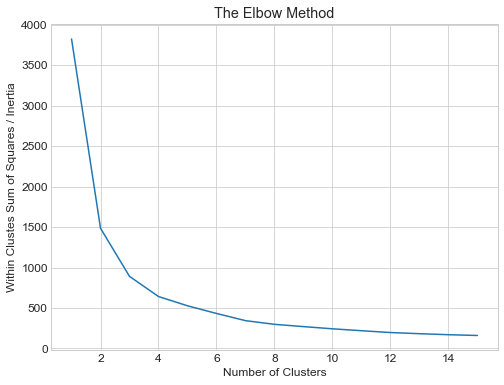

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1,16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clustes Sum of Squares / Inertia')
plt.show()

From the visualization above we can see that the data converges at around 4 to 8 clusters. In this particular case we will use 5 clusters in the final model.

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Prepare the datasets

We will do this by creating two different datasets.

    Dataset containing the original Boston Housing data, principal components and the cluster information.
    Dataset containing information about the principal components.


In [9]:
columns = np.append(boston.feature_names,['MEDV','PC 1', 'PC 2', 'Cluster'])
data = np.concatenate((boston.data, boston.target.reshape(-1,1), X_pca, y_kmeans.reshape(-1,1)), axis=1)
df_housing = pd.DataFrame(data=data, columns=columns)
df_housing.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PC 1,PC 2,Cluster
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52,24.5,-2.091927,-1.139732,3.0
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7,-1.630500,-0.699573,3.0
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53,14.6,2.597987,1.812315,4.0
237,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8.0,307.0,17.4,390.07,4.73,31.5,-1.446350,0.691059,3.0
210,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7,-0.176842,2.384339,0.0


In [10]:
columns = np.append(boston.feature_names,['VARRATIO'])
data = np.concatenate((pca.components_, pca.explained_variance_ratio_.reshape(-1,1)), axis=1)
df_pca = pd.DataFrame(data=data, columns=columns, index=['PC 1', 'PC 2'])
df_pca

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VARRATIO
PC 1,0.250951,-0.256315,0.346672,0.005042,0.342852,-0.189243,0.313671,-0.321544,0.319793,0.338469,0.204942,-0.202973,0.309760,0.471296
PC 2,-0.315252,-0.323313,0.112493,0.454829,0.219116,0.149332,0.311978,-0.349070,-0.271520,-0.239454,-0.305897,0.238559,-0.074322,0.110252


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

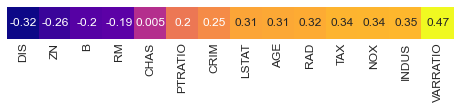

In [16]:
df_pca.index = ['PC1', 'PC2']
plt.figure(figsize=(8, 2))
plt.xticks(rotation=45)
data = df_pca.loc['PC1', :].to_frame().sort_values(by='PC1').transpose()
sns.heatmap(data,
            cmap='plasma',
            square=True,
            annot=True,
            cbar=False,
            yticklabels='')
plt.show()